# Linear and Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
ds = pd.read_csv("HRV.csv")

## Dataset Preprocessing

In [3]:
ds.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [5]:
ds.describe()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4234.000000,4234.000000,4234.000000,4184.000000,4234.000000,4234.000000,4215.000000,4233.000000,3847.000000,4234.000000
mean,0.428909,49.583845,0.494095,236.723231,132.347780,82.886042,25.800624,75.882825,81.976085,0.151630
std,0.494979,8.575050,0.500024,44.608268,22.046338,11.911857,4.081183,12.031365,23.966195,0.358704
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,263.000000,144.000000,89.500000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [6]:
ds.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='totChol', ylabel='Count'>

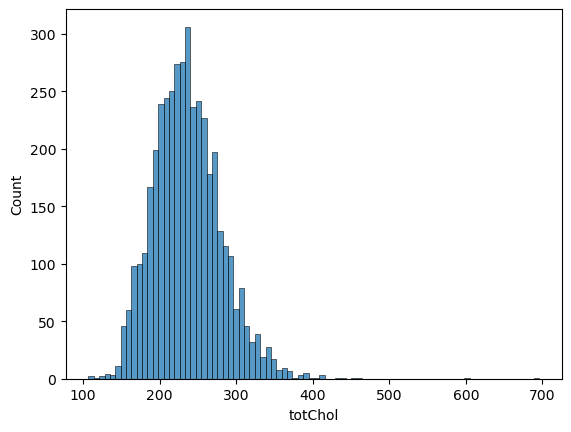

In [7]:
sns.histplot(ds['totChol'])

In [8]:
#totChol
totChol_mean= ds.totChol.mean()
print(totChol_mean)

236.72323135755258


In [9]:
ds.totChol.fillna(totChol_mean, inplace=True)

In [10]:
ds.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Count'>

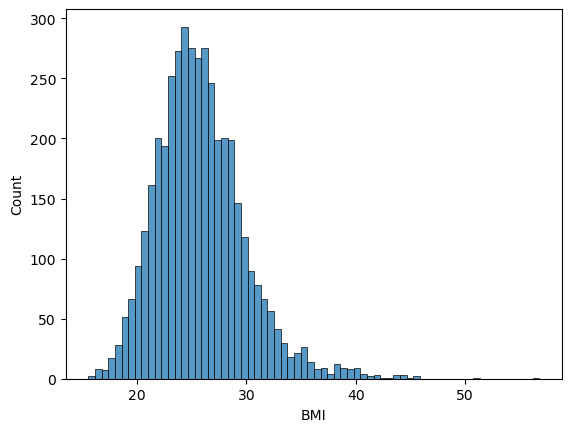

In [11]:
sns.histplot(ds['BMI'])

In [12]:
#BMI
BMI_mean= ds.BMI.mean()
print(BMI_mean)

25.800623962040316


In [13]:
ds.BMI.fillna(BMI_mean, inplace=True)

In [14]:
#heartRate
heartRate_mean= ds.heartRate.mean()
print(heartRate_mean)
ds.heartRate.fillna(heartRate_mean, inplace=True)

75.88282541932436


In [15]:
#glucose
glucose_mean= ds.glucose.mean()
print(glucose_mean)
ds.glucose.fillna(glucose_mean, inplace=True)

81.97608526124253


In [16]:
ds.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64


## A. Linear Regression - Create a model to predict the cholestrol level of a person

In [17]:
ds.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Create independent and dependent variables to predict 

In [18]:
x=ds[['male', 'age', 'currentSmoker', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD']]

In [19]:
y=ds[['totChol']]

## Splitting the dataset into the Training set and Test set

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)

## Training the Linear Regression model 

In [21]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
#.fit to train your model
regressor.fit(x_train.values,y_train)

LinearRegression()

In [22]:
y_pred=regressor.predict(x_test.values)

## Model performance check- R Square and RMSE score

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [24]:
print(F"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred)):.2f}")

RMSE: 45.21


In [25]:
print(f"R-square: {r2_score(y_test,y_pred):.2f}")

R-square: 0.06


## Predicting new results where the actual results are given
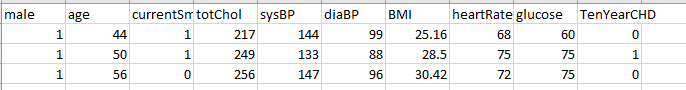

In [26]:
# case 1 actual 217
regressor.predict([[1,44,1,144,99,25.16,68,60,0]])

array([[229.4528633]])

In [27]:
# case 2 actual 249
regressor.predict([[1,50,1,133,88,28.5,75,75,1]])

array([[236.96454907]])

In [28]:
# case 3 actual 256
regressor.predict([[1,56,0,147,96,30.42,72,75,0]])

array([[245.17524904]])

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

In [32]:
ds.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Create independent and dependent variables to predict

In [39]:
x=ds[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']]

In [40]:
y=ds['TenYearCHD']

## Splitting the dataset into the Training set and Test set

In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=0)

## Training the Logistic Regression model 

In [68]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()
#.fit to train your model
classifier.fit(x_train.values,y_train)

LogisticRegression()

In [69]:
y_pred=classifier.predict(x_test.values)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [70]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [71]:
y_test

3554    0
410     0
3868    1
1487    0
840     1
       ..
3829    1
2527    0
349     0
2100    0
2842    1
Name: TenYearCHD, Length: 1398, dtype: int64

In [72]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1179    3]
 [ 208    8]]


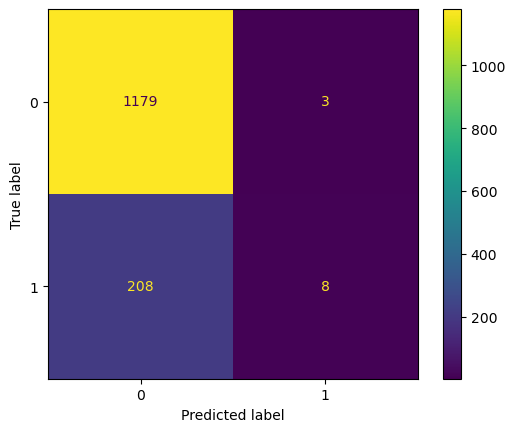

In [74]:
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### Discuss the results

Report:

- TN = No CHD predicted correctly (8)
- TP = CHD predicted correctly (1179)
- FP = Actually no CHD but predicted yes (208)
- FN = Actually CHD predicted no CHD (3)

## Predicting new results where the actual results are given
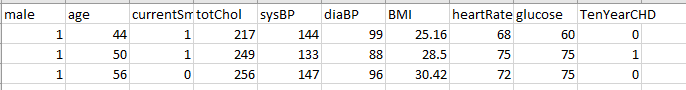

In [76]:
classifier.predict([[1,44,1,217,144,89,25.16,68,60]])

array([0], dtype=int64)

In [77]:
classifier.predict([[1,50,1,249,133,88,28.5,75,75]])

array([0], dtype=int64)

In [78]:
classifier.predict([[1,56,0,256,147,96,30.42,71,75]])

array([0], dtype=int64)

### Summary

In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1182
           1       0.73      0.04      0.07       216

    accuracy                           0.85      1398
   macro avg       0.79      0.52      0.49      1398
weighted avg       0.83      0.85      0.79      1398



In [ ]:
# accuracy score .83

It is an imbalanced dataset as there is more 0's than 1's to support the prediction that is being done by the data set. I used mean for most of my preprocessing as although the data set seems skewed, the mean is still not much different than the median. I made a mistake in the logistic regression part, but it was still fixable thankfully. 